'\nA = np.array([[1,2,3],[4,5,6],[7,8,9]])\na = np.array([[0,0,0]])\nprint(A)\ncolumn = A[:,0]\nA = np.delete(A, 0, axis = 1)\nprint(A)\nA = np.insert(A, 0, a, axis = 1)\nprint(A)\n'

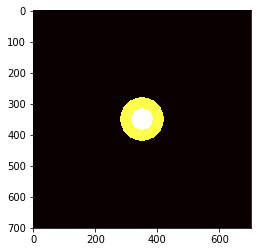

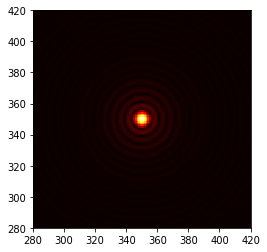

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Thu Nov 29 22:36:22 2018

@author: Cerx
"""

import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2
%matplotlib inline

def rect(aperture, length, width):#for making rectangles
    for j in range(N):
        for i in range(N):
            if width[0] <= i <= width[1] and length[0] <= j <= length[1]:
                aperture[j][i] = 1
    return aperture

def pinhole(matrix, radius, transmittance):
    center = len(matrix)//2
    radius = int(radius)
    phi = np.linspace(0, 2*np.pi, 100*radius)
    for r in range(radius):
        for angle in phi:
            x = int(np.round(r*np.cos(angle),0))
            y = int(np.round(r*np.sin(angle),0))
            if matrix[y + center][x + center] != transmittance:
                matrix[y + center][x + center] = transmittance
    return aperture

def orient(matrix):#something to shift the diff pattern
#pattern[:,0] retruns column 0
    N = len(matrix)
    for n in range(N//2 + 1):
        column = matrix[:,0]
        matrix = np.delete(matrix, 0, axis = 1)
        matrix = np.insert(matrix, N-1, column, axis = 1)
    for n in range(N//2 + 1):
        column = matrix[0,:]
        matrix = np.delete(matrix, 0, axis = 0)
        matrix = np.insert(matrix, N-1, column, axis = 0)
    return matrix

N = 701
aperture = np.zeros([N,N])
#length = (N//2 - 3, N//2 + 3)#for rectangle
#width = (N//2 - 6, N//2 + 6)

r = int((.2*(N-1)+1)/2)
#student number: 2015-01745 i.e. outer transmittance = .45
aperture = pinhole(aperture, r, .45)
aperture = pinhole(aperture, r/2, .55)
#aperture = rect(aperture, length, width)
pattern = fft2(aperture)


plt.figure('Aperture')
plt.imshow(aperture, cmap = 'hot')

plt.figure('Diffraction Pattern')
pattern = abs(pattern)
pattern = orient(pattern)
plt.imshow(pattern, cmap = 'hot')
'''
Since r increases with N according to instruction, diffraction pattern shrinks.
Therefore, zoom in to see.
'''
plt.xlim(N//2 - r, N//2 + r)
plt.ylim(N//2 - r, N//2 + r)

'''
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
a = np.array([[0,0,0]])
print(A)
column = A[:,0]
A = np.delete(A, 0, axis = 1)
print(A)
A = np.insert(A, 0, a, axis = 1)
print(A)
'''